In [1]:
import os

from keras import layers
from keras import Model

from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop

import PIL
print('Import successful')

Import successful


In [2]:
pre_trained_model = InceptionV3(input_shape=(150, 150, 3), include_top=False)

2022-03-23 15:09:55.971553: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 15:09:56.002303: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 15:09:56.002521: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 15:09:56.002994: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [4]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [5]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output
last_output

<KerasTensor: shape=(None, 7, 7, 768) dtype=float32 (created by layer 'mixed7')>

In [6]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics=['acc'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [8]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Extract the archive
zip_ref = zipfile.ZipFile("./data/cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("./tmp/")
zip_ref.close()

# Define our example directories and files
base_dir = './tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (150, 150))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary',
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
# Train the model.

history = model.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = 100,
    epochs = 20,
    validation_steps = 50,
    verbose = 2)

Epoch 1/20


2022-03-23 15:10:19.266178: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8201
2022-03-23 15:10:20.055860: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


100/100 - 18s - loss: 0.3578 - acc: 0.8575 - val_loss: 0.0978 - val_acc: 0.9650 - 18s/epoch - 184ms/step
Epoch 2/20
100/100 - 11s - loss: 0.2199 - acc: 0.9125 - val_loss: 0.1112 - val_acc: 0.9610 - 11s/epoch - 110ms/step
Epoch 3/20
100/100 - 11s - loss: 0.2166 - acc: 0.9220 - val_loss: 0.0944 - val_acc: 0.9660 - 11s/epoch - 112ms/step
Epoch 4/20
100/100 - 10s - loss: 0.1825 - acc: 0.9345 - val_loss: 0.1349 - val_acc: 0.9570 - 10s/epoch - 98ms/step
Epoch 5/20
100/100 - 11s - loss: 0.1978 - acc: 0.9315 - val_loss: 0.1284 - val_acc: 0.9610 - 11s/epoch - 108ms/step
Epoch 6/20
100/100 - 10s - loss: 0.1796 - acc: 0.9375 - val_loss: 0.1257 - val_acc: 0.9590 - 10s/epoch - 104ms/step
Epoch 7/20
100/100 - 10s - loss: 0.1891 - acc: 0.9350 - val_loss: 0.1572 - val_acc: 0.9530 - 10s/epoch - 105ms/step
Epoch 8/20
100/100 - 10s - loss: 0.1581 - acc: 0.9450 - val_loss: 0.1130 - val_acc: 0.9680 - 10s/epoch - 103ms/step
Epoch 9/20
100/100 - 10s - loss: 0.1848 - acc: 0.9360 - val_loss: 0.1174 - val_acc: 

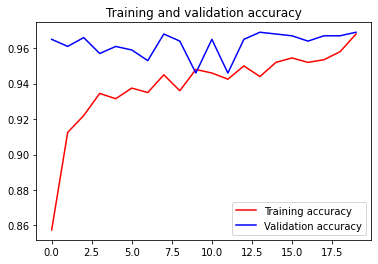

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()